In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## | 2020.09.19 | 시각화 및 EDA과제

#### <div style="text-align: right"> By YBIGTA 16기 DA_Team 유세은</div>

> #### Q. 기업이 신사업을 시작했을 때 고객들이 이를 어떻게 사용하고 있을까?
기업이 만든 새로운 플랫폼을 고객들이 어떤 패턴으로 이용하고 있고, 잘 이용하고 있는지를 분석하고 이를 바탕으로 솔루션을 제시하는 업무를 맡았다고 가정할 때, 이를 위한 간단한 데이터전처리 및 시각화를 해보는 실습.

#####  + 코드를 작성하는 부분에서 Q)가 나온 후, 아래의 결과가 나오도록 두개의 --- 사이에 코드를 작성해주시면 됩니다:)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import font_manager, rc
from matplotlib import style

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### 01 Data 불러오기

In [ ]:
df = pd.read_csv("/content/drive/My Drive/YBIGTA/DA 교육세션/2020-09-19 시각화 일반/과제/df_funnel.csv", index_col=0);df.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016.7.18,Per_Dir
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016.7.18,Pub_Dir
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016.7.6,Main


> ##### Column 설명
+ actiontype: 문서 이용시 행동 <br>
+ ismydoc: 내문서 해당 여부 <br>
+ ext: 문서 확장자 <br>
+ sessionid: 유저 식별자 <br>
+ documentposition: 문서 이용시 위치 정보 <br>
+ datetime: 날짜 <br>
+ screen: 앱내 화면 이름

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301861 entries, 0 to 301860
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   actiontype        301861 non-null  object
 1   ismydoc           301861 non-null  object
 2   ext               301861 non-null  object
 3   sessionid         301861 non-null  object
 4   documentposition  301861 non-null  object
 5   datetime          301861 non-null  object
 6   screen            301861 non-null  object
dtypes: object(7)
memory usage: 18.4+ MB


### 02 데이터 전처리

#### 2-1) datatime의 type이 object이므로 datetime으로 바꿔주기
+ pd.to_datetime() 이용

In [ ]:
# Q1) 날짜별로 데이터가 몇개씩 있는지 확인해보는 코드를 작성해주세요.
df["datetime"].value_counts().head(10)

2016.7.12    12340
2016.7.13    12159
2016.7.26    12034
2016.7.20    11912
2016.7.19    11872
2016.7.1     11836
2016.7.14    11721
2016.7.21    11599
2016.7.27    11593
2016.7.22    11250
Name: datetime, dtype: int64

In [ ]:
# Q2) object type인 'datetime'을 datetime으로 바꿔주는 코드를 작성해주세요.
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'].head(10)

0   2016-07-18
1   2016-07-18
2   2016-07-18
3   2016-07-18
4   2016-07-06
5   2016-07-06
6   2016-07-20
7   2016-07-20
8   2016-07-28
9   2016-07-28
Name: datetime, dtype: datetime64[ns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301861 entries, 0 to 301860
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   actiontype        301861 non-null  object        
 1   ismydoc           301861 non-null  object        
 2   ext               301861 non-null  object        
 3   sessionid         301861 non-null  object        
 4   documentposition  301861 non-null  object        
 5   datetime          301861 non-null  datetime64[ns]
 6   screen            301861 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 18.4+ MB


In [ ]:
# Q2-1) df.info()가 다음과 같이 나오도록 Q2)를 참고하여 코드를 작성해주세요.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301861 entries, 0 to 301860
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   actiontype        301861 non-null  object        
 1   ismydoc           301861 non-null  object        
 2   ext               301861 non-null  object        
 3   sessionid         301861 non-null  object        
 4   documentposition  301861 non-null  object        
 5   datetime          301861 non-null  datetime64[ns]
 6   screen            301861 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 18.4+ MB


In [ ]:
# Q3) df에 요일을 나타내는 새로운 칼럼 "df['day_of_week']"을 생성하고, 요일별 데이터 수를 카운트하는 코드를 작성하세요.
# ------------------------
df['day_of_week'] = df['datetime'].dt.day_name()
df.groupby('day_of_week').size()

day_of_week
Friday       55386
Monday       39403
Saturday     42157
Sunday       26803
Thursday     44689
Tuesday      47234
Wednesday    46189
dtype: int64

In [ ]:
df.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,day_of_week
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,Monday
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,Monday
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,Monday
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,Monday
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,Wednesday


#### 2-2) 결측치 처리하기

In [ ]:
# screen칼럼으로 user의 상품 구매여부를 알 수 있습니다.
df['screen'].unique()

array(['Per_Dir', 'Pub_Dir', 'Main', 'InProduct_Web', 'InProduct_Mob',
       'Purchase_page', 'Purchase_done'], dtype=object)

In [ ]:
# Q4) 아래와 같은 결과가 나오도록 'datetime'과 'screen'별 사용자를 카운트하는 코드를 이어서 작성하세요.
df_by_screen =  df.groupby(["datetime", "screen"])['sessionid'].nunique().unstack()
df_by_screen.head()

screen,InProduct_Mob,InProduct_Web,Main,Per_Dir,Pub_Dir,Purchase_done,Purchase_page
datetime,,,,,,,
2016-07-01,137.0,147.0,3582.0,296.0,1008.0,2.0,23.0
2016-07-02,89.0,124.0,2683.0,206.0,801.0,2.0,15.0
2016-07-03,50.0,83.0,1886.0,165.0,590.0,NaN,28.0
2016-07-04,112.0,104.0,2808.0,281.0,764.0,NaN,29.0
2016-07-05,118.0,138.0,3335.0,300.0,842.0,1.0,26.0


In [ ]:
# 결측치 확인
# 원래 데이터에는 NaN값이 없었지만, groupby 이후에 생김
df_by_screen.isnull().sum()

screen
InProduct_Mob    0
InProduct_Web    0
Main             0
Per_Dir          0
Pub_Dir          0
Purchase_done    6
Purchase_page    0
dtype: int64

구매페이지까지는 갔으나, 구매를 완료하지 않은 날들이 있다는 것을 의미!

In [ ]:
# 결측치를 채우는 방법은 여러가지가 있지만, 여기서는 구매를 하지 않은 것이므로 0으로 채우겠습니다.
# Q5) 'Purchase_done'칼럼을 0으로 채워주는 코드를 작성하세요.

df_by_screen = df_by_screen.replace(np.nan, 0)

#### 2-3) 확장자명 통일하기

In [ ]:
# 'ext'칼럼은 문서확장자를 의미합니다.
# 데이터를 살펴보면 비슷한 확장자들이 보이기 때문에, 전처리 과정에서 비슷한 확장자들을 통일해주겠습니다.
df['ext'].value_counts()

PDF      82004
DOCX     58303
XLSX     52118
HWP      26244
DOC      24586
XLS      24489
PPTX     15385
TXT       9814
PPT       5382
PPSX      2374
ODT        820
PPS        324
JPG          9
SHEET        5
WORD         2
PNG          2
Name: ext, dtype: int64

In [ ]:
# 비슷한 확장자 딕셔너리
ext_dic = {'DOCX': 'DOC',
           'XLSX': 'XLS',
           'PPTX': 'PPT',
           'PPSX': 'PPT',
           'PPS': 'PPT',
           'ODT': 'TXT',
           'PNG': 'JPG'}

In [ ]:
# Q6) 위의 딕셔너리를 이용하여 아래와 같은 결과가 나오도록 비슷한 확장자를 통일해주는 코드를 작성해주세요.
for i in range(len(df["ext"])):
  if df["ext"][i] in ext_dic:
    df['ext'][i] = ext_dic[df["ext"][i]]
df["ext"].value_counts()

DOC      82889
PDF      82004
XLS      76607
HWP      26244
PPT      23465
TXT      10634
JPG         11
SHEET        5
WORD         2
Name: ext, dtype: int64

같은 방식을 'actiontype'에게도 사용하겠습니다.

In [ ]:
df['actiontype'].value_counts()

OPEN            151802
CLOSE           127922
SAVE              9334
RESET             7751
SAVEAS            4960
EXPORT_SAME         68
EXPORT              19
SAVEAS_OTHER         5
Name: actiontype, dtype: int64

In [ ]:
act_dic = {'SAVEAS': 'SAVE',
           'SAVEAS_OTHER': 'SAVE',
           'EXPORT_SAME': 'EXPORT'
            }

In [ ]:
# Q7) 위의 딕셔너리를 이용하여 아래와 같은 결과가 나오도록 비슷한 타입을 통일해주는 코드를 작성해주세요.
for i in range(len(df["actiontype"])):
  if i in act_dic:
    df['actiontype'][i] = act_dic[df["actiontype"][i]]
df["actiontype"].value_counts()
# ------------------------

OPEN            151802
CLOSE           127922
SAVE              9334
RESET             7751
SAVEAS            4960
EXPORT_SAME         68
EXPORT              19
SAVEAS_OTHER         5
Name: actiontype, dtype: int64

#### 2-4) 복잡한 데이터를 지닌 sessionid 간단하게 만들어주기

In [ ]:
df.head()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,day_of_week
0,OPEN,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,Monday
1,CLOSE,NoView,PDF,9400fd2e43d7dc2d054ca78806236ee1,LOCALSTORAGE,2016-07-18,Per_Dir,Monday
2,OPEN,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,Monday
3,CLOSE,View,PDF,9400fd2e43d7dc2d054ca78806236ee1,MYPOLARISDRIVE,2016-07-18,Pub_Dir,Monday
4,OPEN,NoView,PDF,f191063c562691041dfa935ff0876975,OTHERAPP,2016-07-06,Main,Wednesday


In [ ]:
df.tail()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,day_of_week
301856,CLOSE,View,XLS,2ed068d5e6a72e80e4a997c01c59f782,OTHERAPP,2016-07-07,Main,Thursday
301857,OPEN,NoView,DOC,41b8c1df291edd2aec30fc610e5b676e,OTHERAPP,2016-07-05,Main,Tuesday
301858,RESET,View,DOC,41b8c1df291edd2aec30fc610e5b676e,OTHERAPP,2016-07-05,Main,Tuesday
301859,OPEN,NoView,PPT,9b5ee236571c2fcbe25132b6ba71d764,OTHERAPP,2016-07-14,Main,Thursday
301860,CLOSE,NoView,PPT,9b5ee236571c2fcbe25132b6ba71d764,OTHERAPP,2016-07-14,Main,Thursday


In [ ]:
# 보다 간편한 데이터 분석을 위해 sessionid를 간단하게 바꿔주겠습니다.
# sessionid가 같다는 것은 같은 user라는 것이므로, user을 1, 2, 3... 형태로 나타내겠습니다.
newid = []
n = 1

# Q8) 같은 id를 가진 user면 같은 수를 부여하고, 아니면 +1의 숫자를 부여하는 식으로 이어가는 코드를 작성해주세요.
# ------------------------
id_dic = {}
for i in range(len(df)):
  if df['sessionid'][i] not in id_dic:
       id_dic[df["sessionid"][i]] = n
       n = n+1

for i in range(len(df)):
  newid.append(id_dic[df["sessionid"][i]])
# ------------------------

In [ ]:
# 이러한 결과가 나오면 성공입니다.
newid[:10]

[1, 1, 1, 1, 2, 2, 3, 3, 4, 4]

In [ ]:
df['sessionid']  = pd.Series(['user' + str(x) for x in newid])

In [ ]:
# for문으로 인해 맨 마지막 값이 NaN값이 되었습니다.
# 원래 데이터를 보니 바로 위의 user와 같은 user임을 알 수 있습니다.
df.tail()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,day_of_week
301856,CLOSE,View,XLS,user114992,OTHERAPP,2016-07-07,Main,Thursday
301857,OPEN,NoView,DOC,user114993,OTHERAPP,2016-07-05,Main,Tuesday
301858,RESET,View,DOC,user114993,OTHERAPP,2016-07-05,Main,Tuesday
301859,OPEN,NoView,PPT,user114994,OTHERAPP,2016-07-14,Main,Thursday
301860,CLOSE,NoView,PPT,user114994,OTHERAPP,2016-07-14,Main,Thursday


In [ ]:
# Q9) 'sessionid'의 맨 마지막 결측치를 바로 위의 id와 같게 채워주는 코드를 작성하세요.
# ------------------------
# ------------------------
df.tail()

,actiontype,ismydoc,ext,sessionid,documentposition,datetime,screen,day_of_week
301856,CLOSE,View,XLS,user114992,OTHERAPP,2016-07-07,Main,Thursday
301857,OPEN,NoView,DOC,user114993,OTHERAPP,2016-07-05,Main,Tuesday
301858,RESET,View,DOC,user114993,OTHERAPP,2016-07-05,Main,Tuesday
301859,OPEN,NoView,PPT,user114994,OTHERAPP,2016-07-14,Main,Thursday
301860,CLOSE,NoView,PPT,user114994,OTHERAPP,2016-07-14,Main,Thursday


### 03 EDA 및 시각화

#### 3-1) 일별 Trend

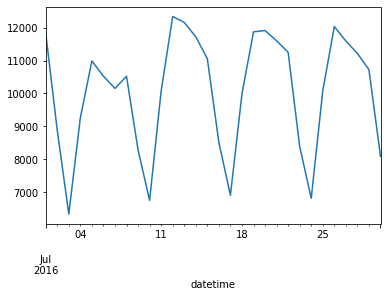

In [ ]:
# Q10) 위에서 살펴보았던 날짜별 이용건수를 아래와 같이 그래프로 나타내는 코드를 작성하세요.

df.groupby(['datetime']).size().plot()

# 위의 코드는 아주 간단하게 이렇게도 쓸 수 있습니다.
# df.groupby(['datetime']).size().plot()

<BarContainer object of 30 artists>

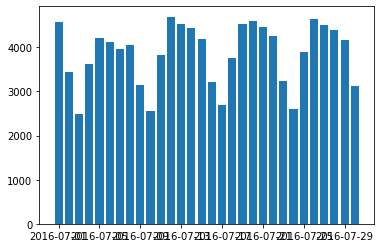

In [ ]:
# Q11) 이번에는 요일별로 이용건수를 아래와 같이 막대그래프로 나타내는 코들르 작성하세요.
# ------------------------
dt_day = df.groupby("datetime")['sessionid'].nunique()
dt_day.index = dt_day.index
plt.bar(df.groupby(['datetime']).size().index,dt_day.values)

# ------------------------
# Mon = 0, Sun = 6

##### Q11-1) 위 두 그래프를 보고 알 수 있는 것은?
: 주말에 사용자가 적은 편이다

그럼 이제 일별 어느 확장자를 많이 사용하는지 알아보는 그래프를 그려보겠습니다.

In [ ]:
dt_ext = df.groupby(["datetime", "ext"]).size().unstack(); dt_ext.head()

ext,DOC,HWP,JPG,PDF,PPT,SHEET,TXT,WORD,XLS
datetime,,,,,,,,,
2016-07-01,3298.0,908.0,NaN,3177.0,918.0,2.0,361.0,NaN,3172.0
2016-07-02,2458.0,577.0,2.0,2491.0,697.0,NaN,392.0,NaN,2267.0
2016-07-03,1768.0,569.0,NaN,1719.0,540.0,NaN,303.0,NaN,1435.0
2016-07-04,2483.0,892.0,NaN,2450.0,704.0,NaN,320.0,NaN,2411.0
2016-07-05,2992.0,858.0,NaN,3058.0,942.0,NaN,356.0,NaN,2782.0


In [ ]:
# Q12) 각 항목당 결측치 비율을 나타내는 코드를 작성하세요.
dt_ext.isna().sum() / dt_ext.shape[0] *100

ext
DOC       0.000000
HWP       0.000000
JPG      73.333333
PDF       0.000000
PPT       0.000000
SHEET    90.000000
TXT       0.000000
WORD     96.666667
XLS       0.000000
dtype: float64

결측치가 있는 칼럼의 결측치가 너무 많기 때문에 그냥 drop해주겠습니다.

In [ ]:
# Q13) 결측치가 있는 항목을 drop해주는 코드를 작성하세요.
dt_ext.drop('JPG',axis=1, inplace=True)
dt_ext.drop('SHEET',axis=1, inplace=True)
dt_ext.drop('WORD',axis=1, inplace=True)
dt_ext.isna().sum() / len(dt_ext)*100

ext
DOC    0.0
HWP    0.0
PDF    0.0
PPT    0.0
TXT    0.0
XLS    0.0
dtype: float64

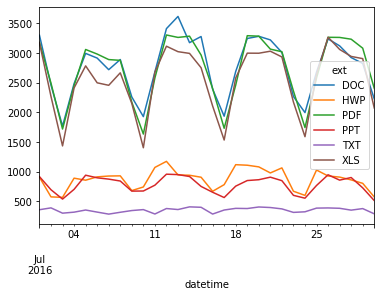

In [ ]:
# Q14) 아래와 같은 그래프가 나올 수 있도록 코드를 작성해주세요.
dt_ext.plot()

Documentposition, Actiontype도 같은 방법으로 그래프를 나타낼 수 있습니다.

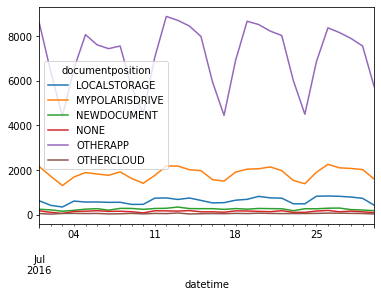

In [ ]:
# Q14-1) Documentation 아래와 같은 그래프가 나올 수 있도록 코드를 작성해주세요.
# 위 그래프의 코드와 매우 흡사하기 때문에, 기초적인 그래프를 그리는 코드는 적어놓았고, 각자 원하는 커스터마이징을 해보세요.
# ------------------------
df.groupby(["datetime", "documentposition"]).size().unstack().dropna(axis=1).plot()
# ------------------------

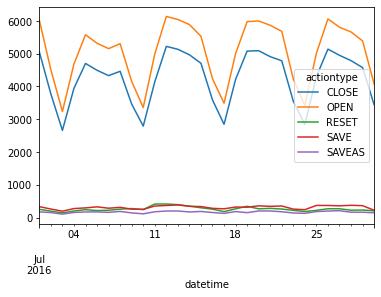

In [ ]:
# Q14-2) Actiontype 아래와 같은 그래프가 나올 수 있도록 코드를 작성해주세요.
# ------------------------
df.groupby(["datetime", "actiontype"]).size().unstack().dropna(axis=1).plot()

# ------------------------

다음은 screen을 이용하여 heatmap을 그려보겠습니다.

In [ ]:
dt_screens = df.groupby(["datetime", "screen"])['sessionid'].nunique().unstack(); dt_screens.head()

screen,InProduct_Mob,InProduct_Web,Main,Per_Dir,Pub_Dir,Purchase_done,Purchase_page
datetime,,,,,,,
2016-07-01,137.0,147.0,3582.0,296.0,1008.0,2.0,23.0
2016-07-02,89.0,124.0,2683.0,206.0,801.0,2.0,15.0
2016-07-03,50.0,83.0,1886.0,165.0,590.0,NaN,28.0
2016-07-04,112.0,104.0,2808.0,281.0,764.0,NaN,29.0
2016-07-05,118.0,138.0,3335.0,300.0,842.0,1.0,26.0


In [ ]:
# dtype을 주목해주세요.
dt_screens.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2016-07-01 to 2016-07-30
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InProduct_Mob  30 non-null     float64
 1   InProduct_Web  30 non-null     float64
 2   Main           30 non-null     float64
 3   Per_Dir        30 non-null     float64
 4   Pub_Dir        30 non-null     float64
 5   Purchase_done  24 non-null     float64
 6   Purchase_page  30 non-null     float64
dtypes: float64(7)
memory usage: 1.9 KB


In [ ]:
# Q15) 각 항목당 결측치 비율을 확인해본 후, 결측치를 어떻게 처리하면 좋을지 생각하여 아래의 결과가 나오도록 코드를 작성하세요.
# ------------------------
dt_screens=dt_screens.fillna(0)
print(dt_screens.info())
print(dt_screens.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2016-07-01 to 2016-07-30
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InProduct_Mob  30 non-null     float64
 1   InProduct_Web  30 non-null     float64
 2   Main           30 non-null     float64
 3   Per_Dir        30 non-null     float64
 4   Pub_Dir        30 non-null     float64
 5   Purchase_done  30 non-null     float64
 6   Purchase_page  30 non-null     float64
dtypes: float64(7)
memory usage: 1.9 KB
None
screen
InProduct_Mob    0
InProduct_Web    0
Main             0
Per_Dir          0
Pub_Dir          0
Purchase_done    0
Purchase_page    0
dtype: int64


In [ ]:
# Q16) 데이터 타입을 float에서 int로 바꿔주세요.
screens = dt_screens.astype('int64')
screens.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2016-07-01 to 2016-07-30
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   InProduct_Mob  30 non-null     int64
 1   InProduct_Web  30 non-null     int64
 2   Main           30 non-null     int64
 3   Per_Dir        30 non-null     int64
 4   Pub_Dir        30 non-null     int64
 5   Purchase_done  30 non-null     int64
 6   Purchase_page  30 non-null     int64
dtypes: int64(7)
memory usage: 1.9 KB


In [ ]:
# 가독성이 좋은 heatmap을 위해 평균이 높은 칼럼순으로 내림차순 정렬을 해주었습니다.
screens = screens[screens.mean().sort_values(ascending=False).index]; screens.head()

screen,Main,Pub_Dir,Per_Dir,InProduct_Web,InProduct_Mob,Purchase_page,Purchase_done
datetime,,,,,,,
2016-07-01,3582,1008,296,147,137,23,2
2016-07-02,2683,801,206,124,89,15,2
2016-07-03,1886,590,165,83,50,28,0
2016-07-04,2808,764,281,104,112,29,0
2016-07-05,3335,842,300,138,118,26,1


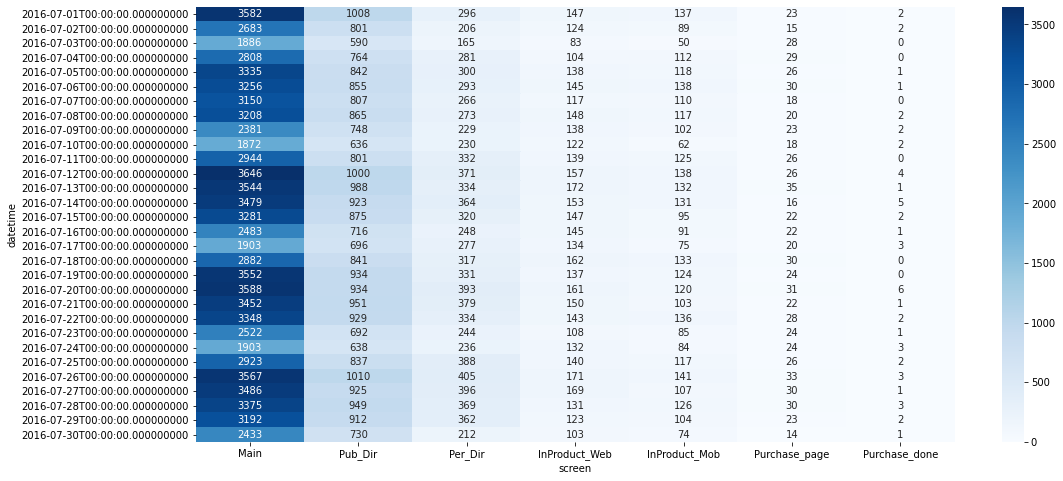

In [ ]:
# Q17) 아래와 같은 결과가 나올 수 있도록 heatmap을 그려주세요.
# ------------------------
plt.subplots(figsize=(17,8))
sns.heatmap(screens,cmap='Blues', annot=True, fmt='d')
# ------------------------

##### Q17-1) 위 heatmap을 보고 알 수 있는 것은?
:  실제 구매자 비율 낮음

#### 3-2) Pivot을 이용한 데이터 분석

먼저 actiontype과 ext사이의 상관관계를 파악해보겠습니다.

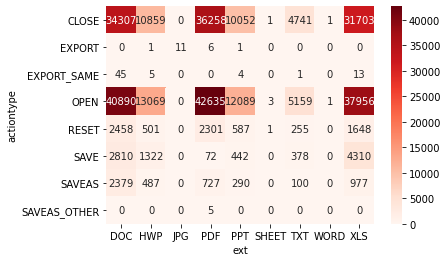

In [ ]:
# Q18) actiontype과 ext를 'sessionid'를 기준으로 groupby한 후, 결측치를 0으로 채우는 코드를 작성하세요.
# 맨끝에 dtype을 int로 바꾸어주는 코드도 함께 넣어주세요. (due to heatmap)
# ------------------------
action_ext = df.groupby(["actiontype", "ext"])['sessionid'].size().unstack().replace(np.nan,0)
action_ext = action_ext.astype('int64')

sns.heatmap(action_ext,cmap='Reds', annot=True, fmt='d')

# ------------------------

특정 ect에서 주로 사용하는 actiontype을 알 수 있습니다. <br>
이렇게 다른 변수들간의 상관관계 분석도 진행할 수 있습니다.

#### 3-3) 구간별 전환율

마지막으로 구간별 전환율에 대한 시각화를 해보겠습니다. <br>
이는 위에서도 잠시 언급했던, 평균적으로 어느 구간에서 사용자들이 이탈하는지를 좀 더 자세히 확인할 수 있는 방법입니다.

In [ ]:
# 위에서 만들었던 screens를 다시 불러오겠습니다.
print(screens.info())
screens.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2016-07-01 to 2016-07-30
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Main           30 non-null     int64
 1   Pub_Dir        30 non-null     int64
 2   Per_Dir        30 non-null     int64
 3   InProduct_Web  30 non-null     int64
 4   InProduct_Mob  30 non-null     int64
 5   Purchase_page  30 non-null     int64
 6   Purchase_done  30 non-null     int64
dtypes: int64(7)
memory usage: 1.9 KB
None


screen,Main,Pub_Dir,Per_Dir,InProduct_Web,InProduct_Mob,Purchase_page,Purchase_done
datetime,,,,,,,
2016-07-01,3582,1008,296,147,137,23,2
2016-07-02,2683,801,206,124,89,15,2
2016-07-03,1886,590,165,83,50,28,0
2016-07-04,2808,764,281,104,112,29,0
2016-07-05,3335,842,300,138,118,26,1


In [ ]:
# Q19) 아래 결과와 같이 screen 칼럼별 평균을 구하는 코드를 작성하세요.
# 이 때, apply함수를 사용하여 dtype을 int로 만들어주고, 내림차순으로 정렬해주세요.
# ------------------------
convert = screens.mean().astype('int64')
# ------------------------
convert

screen
Main             2988
Pub_Dir           839
Per_Dir           305
InProduct_Web     138
InProduct_Mob     109
Purchase_page      24
Purchase_done       1
dtype: int64

In [ ]:
# Q20) 아래 list에 전환율을 계산하여 append해주세요.
# 전환율 = 다음단계 건수 / 이번단계 건수
# ------------------------
convert_rate = []
for i in range(len(convert)-1):
  convert_rate.append(round(convert[i+1] / convert[i]*100,2))
# ------------------------
convert_rate

[28.08, 36.35, 45.25, 78.99, 22.02, 4.17]

<BarContainer object of 6 artists>

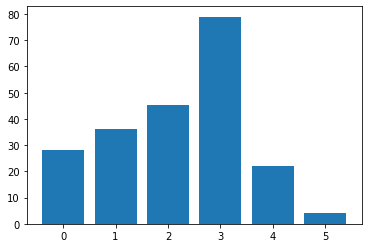

In [ ]:
# Q20) 위의 data를 가지고 전환율을 아래와 같이 bar chart로 나타내는 코드를 작성하세요.
# conver_rate가 list이므로 series로 바꾸어주는 작업이 필요합니다.
# ------------------------
convert_rate = pd.Series(convert_rate)
plt.bar(np.arange(0,6),convert_rate)
# ------------------------

In [ ]:
# 이 때, x축이 의미하는 것이 명확하지 않으므로 index를 바꿔주겠습니다.
x_index = [convert.index[i]+' > '+convert.index[i+1] for i ,v in enumerate(convert.index) if i < 6]
x_index

['Main > Pub_Dir',
 'Pub_Dir > Per_Dir',
 'Per_Dir > InProduct_Web',
 'InProduct_Web > InProduct_Mob',
 'InProduct_Mob > Purchase_page',
 'Purchase_page > Purchase_done']

Text(0.5, 1.0, 'Convert Rate(%)')

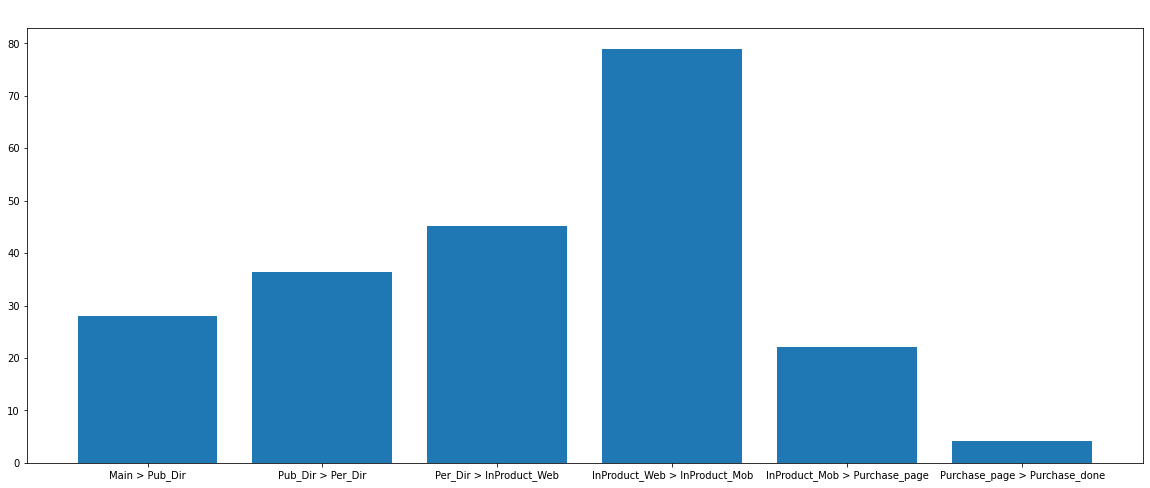

In [ ]:
# Q20-1) x_index를 가지고 아래 결과와 같이 x축의 index를 바꾸는 코드를 작성하세요.
# ------------------------
plt.subplots(figsize=(20,8))
plt.bar(x_index, convert_rate)
plt.title('Convert Rate(%)', color='w', size=20)
# ------------------------

##### Q20-2) 가장 이탈율이 높은 구간은?
:InProduct_Web > InProduct_Mob

끝으로, 지금까지 분석한 내용을 바탕으로 솔루션을 제시해본다면 어떤 솔루션이 좋을지 한번쯤 생각해봐도 좋을것 같습니당ㅎㅎ

#### 수고하셨습니다:)